In [14]:
import pandas as pd
fold1 = pd.read_csv('../data/final/fold1.csv')
fold2 = pd.read_csv('../data/final/fold2.csv')
fold3 = pd.read_csv('../data/final/fold3.csv')
fold4 = pd.read_csv('../data/final/fold4.csv')

/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
fold1.set_index('Unnamed: 0', inplace=True)
fold2.set_index('Unnamed: 0', inplace=True)
fold3.set_index('Unnamed: 0', inplace=True)
fold4.set_index('Unnamed: 0', inplace=True)
columns = ['BUN', 'bicarbonate', 'calcium', 'chloride',
           'creatinine', 'glucose', 'potassium', 'sodium',
           'BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
           'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
           'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
           'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
           'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
           'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
           'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
           'sodium_mean', 'sodium_max', 'sodium_var'
          ]

In [47]:
def relabel_data(df):
    df['time_to_detect'] = pd.to_timedelta(df['time_to_detect'])
    df.loc[df['time_to_detect']<=pd.Timedelta('36h'), 'positive_window'] = 1
    return df
fold1 = relabel_data(fold1)
fold2 = relabel_data(fold2)
fold3 = relabel_data(fold3)
fold4 = relabel_data(fold4)

X_train = pd.concat([fold1[columns], fold2[columns], fold3[columns]], axis=0)
print(X_train.shape)
y_train = pd.concat([fold1['positive_window'], fold2['positive_window'], fold3['positive_window']], axis=0)
print(y_train.shape)
X_val = fold3[columns]
print(X_val.shape)
y_val = fold3['positive_window']
print(y_val.shape)  
X_test = fold4[columns]
print(X_test.shape)
y_test = fold4['positive_window']
print(y_test.shape)
print(y_train.sum()/len(y_train))
print(y_val.sum()/len(y_val))
print(y_test.sum()/len(y_test))

(132164, 40)
(132164,)
(44285, 40)
(44285,)
(43720, 40)
(43720,)
0.12974032262946036
0.12979564186519138
0.1334858188472095


In [120]:
print(len(fold1)+len(fold2)+len(fold3)+len(fold4))
print(sum(y_train)+sum(y_test))

175884
22983.0


In [17]:
X_train.index

Int64Index([   27,    28,    40,    41,    87,    88,    89,    90,    91,
               95,
            ...
            89278, 89279, 89280, 89281, 89282, 89283, 89284, 89318, 89319,
            89320],
           dtype='int64', name='Unnamed: 0', length=87879)

In [36]:
X_train.tail()

,BUN,bicarbonate,calcium,chloride,creatinine,glucose,potassium,sodium,BUN_min,BUN_mean,...,glucose_max,glucose_var,potassium_min,potassium_mean,potassium_max,potassium_var,sodium_min,sodium_mean,sodium_max,sodium_var
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
89283,18.0,26.0,9.1,105.0,0.56,109.0,3.6,139.0,18.0,20.5,...,123.0,98.000000,3.3,3.45,3.6,0.045,139.0,140.500000,142.0,4.500000
89284,19.0,28.0,9.0,107.0,0.61,102.0,3.9,140.0,18.0,20.0,...,123.0,114.333333,3.3,3.60,3.9,0.090,139.0,140.333333,142.0,2.333333
89318,21.0,24.0,8.4,103.0,0.75,94.0,4.3,132.0,21.0,22.0,...,114.0,200.000000,3.5,3.90,4.3,0.320,132.0,133.000000,134.0,2.000000
89319,16.0,29.0,9.1,97.0,0.86,82.0,3.9,131.0,16.0,20.0,...,114.0,261.333333,3.5,3.90,4.3,0.160,131.0,132.333333,134.0,2.333333
89320,13.0,26.0,8.8,103.0,0.77,84.0,4.0,137.0,13.0,14.5,...,84.0,2.000000,3.9,3.95,4.0,0.005,131.0,134.000000,137.0,18.000000


In [44]:
#import numpy as np
cv1_train = np.concatenate((np.array(fold1.index), np.array(fold2.index)))
cv1_test = np.array(fold3.index)
cv2_train = np.concatenate((np.array(fold1.index), np.array(fold3.index))) 
cv2_test = np.array(fold2.index)
cv3_train = np.concatenate((np.array(fold2.index), np.array(fold3.index)))
cv3_test = np.array(fold1.index)
custom_cv = []
custom_cv.append((cv1_train, cv1_test))
custom_cv.append((cv2_train, cv2_test))
custom_cv.append((cv3_train, cv3_test))
custom_cv
# custom_cv = []
# custom_cv.append((fold1.index.tolist(), fold2.index.tolist()))
# custom_cv.append((fold2.index.tolist(), fold1.index.tolist()))
# #custom_cv

[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
  array([    5,     6,     7, ..., 89329, 89330, 89331])),
 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
  array([    8,    17,    81, ..., 89318, 89319, 89320])),
 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
  array([   27,    28,    40, ..., 89313, 89321, 89322]))]

class xgboost.XGBClassifier(objective='binary:logistic', **kwargs)
Bases: xgboost.sklearn.XGBModel, object

Implementation of the scikit-learn API for XGBoost classification.

Parameters
max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

verbosity (int) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

booster (string) – Specify which booster to use: gbtree, gblinear or dart.

tree_method (string) – Specify which tree method to use. Default to auto. If this parameter is set to default, XGBoost will choose the most conservative option available. It’s recommended to study this option from parameters document.

n_jobs (int) – Number of parallel threads used to run xgboost.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

max_delta_step (int) – Maximum delta step we allow each tree’s weight estimation to be.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

colsample_bylevel (float) – Subsample ratio of columns for each level.

colsample_bynode (float) – Subsample ratio of columns for each split.

reg_alpha (float (xgb's alpha)) – L1 regularization term on weights

reg_lambda (float (xgb's lambda)) – L2 regularization term on weights

scale_pos_weight (float) – Balancing of positive and negative weights.

base_score – The initial prediction score of all instances, global bias.

random_state (int) –

Random number seed.

Note
Using gblinear booster with shotgun updater is nondeterministic as it uses Hogwild algorithm.

missing (float, default np.nan) – Value in the data which needs to be present as a missing value.

num_parallel_tree (int) – Used for boosting random forest.

monotone_constraints (str) – Constraint of variable monotonicity. See tutorial for more information.

interaction_constraints (str) – Constraints for interaction representing permitted interactions. The constraints must be specified in the form of a nest list, e.g. [[0, 1], [2, 3, 4]], where each inner list is a group of indices of features that are allowed to interact with each other. See tutorial for more information

importance_type (string, default "gain") – The feature importance type for the feature_importances_ property: either “gain”, “weight”, “cover”, “total_gain” or “total_cover”.

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score, make_scorer

random_state=2020

xgbc = xgb.XGBClassifier(scale_pos_weight=7, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, boosting_rounds=50, early_stopping_rounds=10)


# Define our search space for grid search
search_space = [
  {
      'min_split_loss': range(1, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth': range(3, 10),
      'min_child_weight': range(1, 10),
      'max_delta_step': range(0,11),
      'subsample': [0.5, 0.75, 1],
      'colsample_bytree':[0.5, 0.75, 1], 
      'colsample_bylevel':[0.5, 0.75, 1], 
      'colsample_bynode':[0.5, 0.75, 1],
    'gamma': [i/10.0 for i in range(3)],
    'lambda': np.logspace(-2, 2, num=3),
      'alpha': [0, 0.1, 0.5, 1]
  }
]

# AUC and average precision as score
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
# Define grid search
grid = RandomizedSearchCV(
                          xgbc,
                          search_space,
                          cv=custom_cv,
                          scoring=scoring,
                          refit=False,
                          n_iter=100,
                          verbose=1,
                          n_jobs=-1,
                          return_train_score=True
)
# Fit grid search
model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.7min finished


In [81]:
grid.cv_results_['params'][78]

{'subsample': 1,
 'min_split_loss': 2,
 'min_child_weight': 3,
 'max_depth': 9,
 'max_delta_step': 6,
 'learning_rate': 0.5,
 'lambda': 1.0,
 'gamma': 0.2,
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.5,
 'colsample_bylevel': 1,
 'alpha': 1}

In [75]:
results = pd.DataFrame({'mean_test_AUC':grid.cv_results_['mean_test_AUC'], \
                        'mean_train_AUC':grid.cv_results_['mean_train_AUC'],\
                        'mean_test_Average precision':grid.cv_results_['mean_test_Average precision'],\
                        'mean_train_Average precision':grid.cv_results_['mean_train_Average precision']})
results.sort_values(by='mean_test_Average precision', ascending=False)

,mean_test_AUC,mean_train_AUC,mean_test_Average precision,mean_train_Average precision
78,0.881235,0.999886,0.486099,0.934481
17,0.875816,0.999814,0.476406,0.924361
85,0.864658,0.998577,0.434594,0.852280
66,0.882778,0.995104,0.421428,0.729940
84,0.872596,0.995321,0.411933,0.754681
...,...,...,...,...
30,0.737089,0.751956,0.205434,0.210661
74,0.733630,0.746621,0.201414,0.206193
82,0.729078,0.739631,0.200570,0.204050
40,0.729590,0.742033,0.199503,0.204592


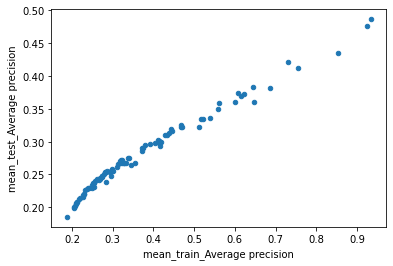

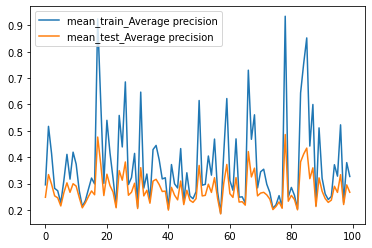

In [79]:
import matplotlib.pyplot as plt
results.plot.scatter(x='mean_train_Average precision', y='mean_test_Average precision')
plt.show()
results[['mean_train_Average precision', 'mean_test_Average precision']].plot()

In [82]:
params = {'subsample': 1,
 'min_split_loss': 2,
 'min_child_weight': 3,
 'max_depth': 9,
 'max_delta_step': 6,
 'learning_rate': 0.5,
 'lambda': 1.0,
 'gamma': 0.2,
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.5,
 'colsample_bylevel': 1,
 'alpha': 1} 

xgbc = xgb.XGBClassifier(scale_pos_weight=7, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, boosting_rounds=50, early_stopping_rounds=10, **params)

X_train_2folds = pd.concat([fold1[columns], fold2[columns]], axis=0)
y_train_2folds = pd.concat([fold1['positive_window'], fold2['positive_window']], axis=0)

eval_set = [(X_val, y_val)]
evallist = [(X_train_2folds,y_train_2folds), (X_val, y_val)]

xgbc.fit(X_train_2folds, y_train_2folds, eval_metric='aucpr', eval_set=evallist, verbose=True)

[0]	validation_0-aucpr:0.29005	validation_1-aucpr:0.19875
[1]	validation_0-aucpr:0.33389	validation_1-aucpr:0.21717
[2]	validation_0-aucpr:0.41839	validation_1-aucpr:0.26291
[3]	validation_0-aucpr:0.45617	validation_1-aucpr:0.29399
[4]	validation_0-aucpr:0.48490	validation_1-aucpr:0.29151
[5]	validation_0-aucpr:0.52676	validation_1-aucpr:0.30990
[6]	validation_0-aucpr:0.54172	validation_1-aucpr:0.31086
[7]	validation_0-aucpr:0.55182	validation_1-aucpr:0.30938
[8]	validation_0-aucpr:0.57396	validation_1-aucpr:0.30955
[9]	validation_0-aucpr:0.59034	validation_1-aucpr:0.30826
[10]	validation_0-aucpr:0.59974	validation_1-aucpr:0.30951
[11]	validation_0-aucpr:0.62039	validation_1-aucpr:0.30974
[12]	validation_0-aucpr:0.62921	validation_1-aucpr:0.31153
[13]	validation_0-aucpr:0.64506	validation_1-aucpr:0.30748
[14]	validation_0-aucpr:0.65811	validation_1-aucpr:0.30675
[15]	validation_0-aucpr:0.67068	validation_1-aucpr:0.30631
[16]	validation_0-aucpr:0.67765	validation_1-aucpr:0.30545
[17]	va

XGBClassifier(alpha=1, base_score=0.5, booster=None, boosting_rounds=50,
              colsample_bylevel=1, colsample_bynode=0.5, colsample_bytree=0.5,
              early_stopping_rounds=10, eval_metric=['aucpr'], gamma=0.2,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              lambda=1.0, learning_rate=0.5, max_delta_step=6, max_depth=9,
              min_child_weight=3, min_split_loss=2, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              random_state=2020, reg_alpha=1, reg_lambda=1, scale_pos_weight=7,
              subsample=1, ...)

In [83]:
y_pred = xgbc.predict(X_test)
ap = average_precision_score(y_test, y_pred)
ap


0.20436190277608202

XGBRFClassifier(learning_rate=1, subsample=0.8, colsample_bynode=0.8, reg_lambda=1e-05, **kwargs)

n_estimators (int) – Number of trees in random forest to fit.

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

verbosity (int) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

booster (string) – Specify which booster to use: gbtree, gblinear or dart.

tree_method (string) – Specify which tree method to use. Default to auto. If this parameter is set to default, XGBoost will choose the most conservative option available. It’s recommended to study this option from parameters document.

n_jobs (int) – Number of parallel threads used to run xgboost.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

max_delta_step (int) – Maximum delta step we allow each tree’s weight estimation to be.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

colsample_bylevel (float) – Subsample ratio of columns for each level.

colsample_bynode (float) – Subsample ratio of columns for each split.

reg_alpha (float (xgb's alpha)) – L1 regularization term on weights

reg_lambda (float (xgb's lambda)) – L2 regularization term on weights

scale_pos_weight (float) – Balancing of positive and negative weights.

base_score – The initial prediction score of all instances, global bias.

random_state (int) –

Random number seed.

Note
Using gblinear booster with shotgun updater is nondeterministic as it uses Hogwild algorithm.

missing (float, default np.nan) – Value in the data which needs to be present as a missing value.

num_parallel_tree (int) – Used for boosting random forest.

monotone_constraints (str) – Constraint of variable monotonicity. See tutorial for more information.

interaction_constraints (str) – Constraints for interaction representing permitted interactions. The constraints must be specified in the form of a nest list, e.g. [[0, 1], [2, 3, 4]], where each inner list is a group of indices of features that are allowed to interact with each other. See tutorial for more information

importance_type (string, default "gain") – The feature importance type for the feature_importances_ property: either “gain”, “weight”, “cover”, “total_gain” or “total_cover”.

In [87]:
xgbrf = xgb.XGBRFClassifier(scale_pos_weight=7, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, boosting_rounds=50, early_stopping_rounds=10)


# Define our search space for grid search
search_space = [
  {
      'n_estimators' : [50, 100, 200, 400],
      'min_split_loss': range(1, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1],
    'max_depth': range(3, 12),
      'min_child_weight': range(1, 10),
      'max_delta_step': range(0,11),
      'subsample': [0.5, 0.75, 1],
      'colsample_bytree':[0.5, 0.75, 1], 
      'colsample_bylevel':[0.5, 0.75, 1], 
      'colsample_bynode':[0.5, 0.75, 1],
    'reg_lambda': np.logspace(0, 2, num=3),
      'reg_alpha': [0, 0.1, 0.5, 1],
      'gamma': [i/10.0 for i in range(5)]
  }
]

# AUC and average precision as score
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
# Define grid search
gridrf = RandomizedSearchCV(
                          xgbrf,
                          search_space,
                          cv=custom_cv,
                          scoring=scoring,
                          refit=False,
                          n_iter=100,
                          verbose=1,
                          n_jobs=-1,
                          return_train_score=True
)
# Fit grid search
modelrf = gridrf.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 93.1min finished


NameError: name 'XGBRFClassifier' is not defined

In [88]:
resultsrf = pd.DataFrame({'mean_test_AUC':gridrf.cv_results_['mean_test_AUC'], \
                        'mean_train_AUC':gridrf.cv_results_['mean_train_AUC'],\
                        'mean_test_Average precision':gridrf.cv_results_['mean_test_Average precision'],\
                        'mean_train_Average precision':gridrf.cv_results_['mean_train_Average precision']})
resultsrf.sort_values(by='mean_test_Average precision', ascending=False)

,mean_test_AUC,mean_train_AUC,mean_test_Average precision,mean_train_Average precision
22,0.817794,0.889352,0.270000,0.338805
28,0.819374,0.893259,0.268435,0.338949
80,0.814907,0.884664,0.260900,0.320564
72,0.811210,0.881292,0.259239,0.316897
79,0.813564,0.891704,0.259010,0.326437
...,...,...,...,...
99,0.673935,0.679318,0.176774,0.178436
89,0.679972,0.685096,0.176323,0.177829
91,0.677502,0.682853,0.175921,0.177682
56,0.676061,0.681545,0.175247,0.177127


In [89]:
gridrf.cv_results_['params'][22]

{'subsample': 0.75,
 'reg_lambda': 10.0,
 'reg_alpha': 0.1,
 'n_estimators': 100,
 'min_split_loss': 5,
 'min_child_weight': 8,
 'max_depth': 11,
 'max_delta_step': 10,
 'learning_rate': 0.5,
 'gamma': 0.2,
 'colsample_bytree': 0.75,
 'colsample_bynode': 1,
 'colsample_bylevel': 1}

In [91]:
params = {'subsample': 0.75,
 'reg_lambda': 10.0,
 'reg_alpha': 0.1,
 'n_estimators': 100,
 'min_split_loss': 5,
 'min_child_weight': 8,
 'max_depth': 11,
 'max_delta_step': 10,
 'learning_rate': 0.5,
 'gamma': 0.2,
 'colsample_bytree': 0.75,
 'colsample_bynode': 1,
 'colsample_bylevel': 1}

xgbrf = xgb.XGBRFClassifier(scale_pos_weight=7, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, boosting_rounds=50, early_stopping_rounds=10, **params)

#X_train_2folds = pd.concat([fold1[columns], fold2[columns]], axis=0)
# y_train_2folds = pd.concat([fold1['positive_window'], fold2['positive_window']], axis=0)

# eval_set = [(X_val, y_val)]
# evallist = [(X_train_2folds,y_train_2folds), (X_val, y_val)]

xgbrf.fit(X_train_2folds, y_train_2folds, eval_metric='aucpr', eval_set=evallist, verbose=True)

[0]	validation_0-aucpr:0.51604	validation_1-aucpr:0.34994


XGBRFClassifier(base_score=0.5, booster=None, boosting_rounds=50,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
                early_stopping_rounds=10, eval_metric=['aucpr'], gamma=0.2,
                gpu_id=-1, importance_type='gain', interaction_constraints=None,
                learning_rate=0.5, max_delta_step=10, max_depth=11,
                min_child_weight=8, min_split_loss=5, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=2020, reg_alpha=0.1, reg_lambda=10.0,
                scale_pos_weight=7, subsample=0.75, tree_method=None,
                validate_parameters=False, ...)

In [93]:
y_predrf = xgbrf.predict_proba(X_test)[:,1]
ap = average_precision_score(y_test, y_predrf)
ap

0.34130533900172233

[[0.75952909 0.24047091]
 [0.36137766 0.63862234]]
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84     37884
         1.0       0.29      0.64      0.40      5836

    accuracy                           0.74     43720
   macro avg       0.61      0.70      0.62     43720
weighted avg       0.85      0.74      0.78     43720



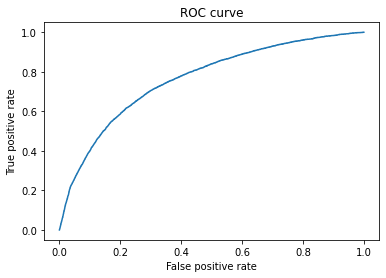

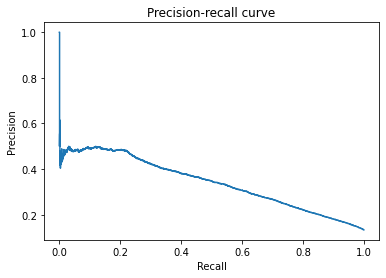

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scorerf = xgbrf.predict(X_test)

print(confusion_matrix(y_test,y_scorerf, normalize='true'))
print(classification_report(y_test,y_scorerf))

fpr, tpr, auc_th = roc_curve(y_test, y_predrf)
precision, recall, pr_th = precision_recall_curve(y_test, y_predrf)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [97]:
#print(xgbrf.coef_)
print(xgbrf.feature_importances_)

[0.02331502 0.01985518 0.0163858  0.03597413 0.17228132 0.01420686
 0.01908524 0.02069316 0.02270496 0.02614089 0.02234331 0.01536054
 0.01423509 0.01483938 0.01506697 0.01384866 0.01405453 0.01311109
 0.01361535 0.0147831  0.01590693 0.01546891 0.01698669 0.01288982
 0.08439066 0.04008478 0.07868537 0.04381363 0.01256099 0.01505765
 0.01600538 0.01235086 0.01355056 0.01443033 0.0144884  0.01206018
 0.01277591 0.01585442 0.01877659 0.01196136]


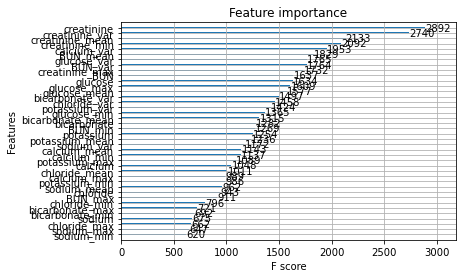

In [99]:
xgb.plot_importance(xgbrf, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, show_values=True)

In [103]:
from sklearn.model_selection import GridSearchCV
xgbrf = xgb.XGBRFClassifier(scale_pos_weight=7, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, boosting_rounds=50, early_stopping_rounds=10)


# Define our search space for grid search
search_space = [
  {
      'n_estimators' : [100],
      'min_split_loss': [5],
    'learning_rate': [0.4, 0.5],
    'max_depth': [11, 12],
      'min_child_weight': [8],
      'max_delta_step': [10],
      'subsample': [0.75],
      'colsample_bytree': [0.75], 
      'colsample_bylevel': [1], 
      'colsample_bynode': [1],
    'reg_lambda': [5, 10, 20],
      'reg_alpha': [0.1],
      'gamma': [0.15, 0.2, 0.25]
  }
]


# AUC and average precision as score
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
# Define grid search
gridrf = GridSearchCV(
                      xgbrf,
                      search_space,
                      cv=custom_cv,
                      scoring=scoring,
                      refit=False,
                      verbose=1,
                      n_jobs=-1,
                      return_train_score=True
)
# Fit grid search
modelrf = gridrf.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 64.0min finished


In [104]:
resultsrf = pd.DataFrame({'mean_test_AUC':gridrf.cv_results_['mean_test_AUC'], \
                        'mean_train_AUC':gridrf.cv_results_['mean_train_AUC'],\
                        'mean_test_Average precision':gridrf.cv_results_['mean_test_Average precision'],\
                        'mean_train_Average precision':gridrf.cv_results_['mean_train_Average precision']})
resultsrf.sort_values(by='mean_test_Average precision', ascending=False)

,mean_test_AUC,mean_train_AUC,mean_test_Average precision,mean_train_Average precision
15,0.833097,0.917671,0.288837,0.382609
3,0.833097,0.917671,0.288837,0.382609
33,0.833097,0.917671,0.288837,0.382609
27,0.833097,0.917671,0.288837,0.382609
9,0.833097,0.917671,0.288837,0.382609
21,0.833097,0.917671,0.288837,0.382609
34,0.826532,0.905526,0.281412,0.365098
4,0.826532,0.905526,0.281412,0.365098
28,0.826532,0.905526,0.281412,0.365098
10,0.826532,0.905526,0.281412,0.365098


In [105]:
gridrf.cv_results_['params'][15]

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.75,
 'gamma': 0.2,
 'learning_rate': 0.4,
 'max_delta_step': 10,
 'max_depth': 12,
 'min_child_weight': 8,
 'min_split_loss': 5,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 5,
 'subsample': 0.75}

In [106]:
params = {'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.75,
 'gamma': 0.2,
 'learning_rate': 0.4,
 'max_delta_step': 10,
 'max_depth': 12,
 'min_child_weight': 8,
 'min_split_loss': 5,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 5,
 'subsample': 0.75}

xgbrf = xgb.XGBRFClassifier(scale_pos_weight=7, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, boosting_rounds=50, early_stopping_rounds=10, **params)

#X_train_2folds = pd.concat([fold1[columns], fold2[columns]], axis=0)
# y_train_2folds = pd.concat([fold1['positive_window'], fold2['positive_window']], axis=0)

# eval_set = [(X_val, y_val)]
# evallist = [(X_train_2folds,y_train_2folds), (X_val, y_val)]

xgbrf.fit(X_train_2folds, y_train_2folds, eval_metric='aucpr', eval_set=evallist, verbose=True)

[0]	validation_0-aucpr:0.58689	validation_1-aucpr:0.35260


XGBRFClassifier(base_score=0.5, booster=None, boosting_rounds=50,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
                early_stopping_rounds=10, eval_metric=['aucpr'], gamma=0.2,
                gpu_id=-1, importance_type='gain', interaction_constraints=None,
                learning_rate=0.4, max_delta_step=10, max_depth=12,
                min_child_weight=8, min_split_loss=5, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=2020, reg_alpha=0.1, reg_lambda=5,
                scale_pos_weight=7, subsample=0.75, tree_method=None,
                validate_parameters=False, ...)

In [108]:
y_predrf = xgbrf.predict_proba(X_test)[:,1]
ap = average_precision_score(y_test, y_predrf)
ap

0.34421353431239915

[[0.78299546 0.21700454]
 [0.38536669 0.61463331]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85     37884
         1.0       0.30      0.61      0.41      5836

    accuracy                           0.76     43720
   macro avg       0.62      0.70      0.63     43720
weighted avg       0.85      0.76      0.79     43720



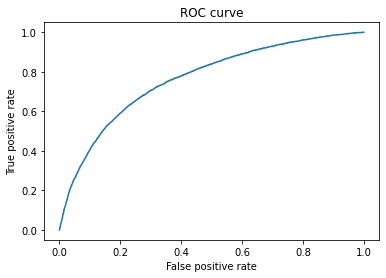

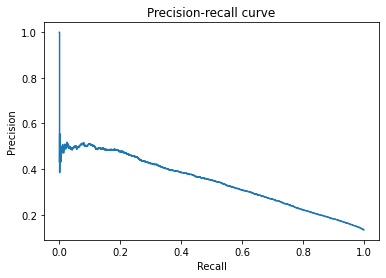

In [109]:
y_scorerf = xgbrf.predict(X_test)

print(confusion_matrix(y_test,y_scorerf, normalize='true'))
print(classification_report(y_test,y_scorerf))

fpr, tpr, auc_th = roc_curve(y_test, y_predrf)
precision, recall, pr_th = precision_recall_curve(y_test, y_predrf)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [131]:
pr_th = np.append(pr_th, pr_th[-1])
xgb_pr = pd.DataFrame({'Precision_xgb': precision, 'Recall_xgb': recall, 'Threshold_xgb': pr_th})
xgb_pr.to_csv('../models/xgb_pr.csv')


In [124]:
from sklearn.metrics import fbeta_score
f1 = fbeta_score(y_test, y_scorerf, beta=1.0)
f2 = fbeta_score(y_test, y_scorerf, beta=2.0)
print('F1: ', f1)
print('F2: ', f2)

F1:  0.4065971435048742
F2:  0.5102127901684116


In [110]:
import pickle
# save model to file
pickle.dump(xgbrf, open('../models/xgbrf.pkl', 'wb'))

In [151]:
np.where(recall>=0.6)

(array([    0,     1,     2, ..., 32142, 32143, 32144]),)

In [154]:
np.where(precision>=0.33)

(array([33797, 33798, 33803, ..., 43465, 43466, 43467]),)

In [156]:
precision[33797]

0.3300319818425668

In [157]:
recall[33797]

0.5481494174091843

In [174]:
pr_th[33797]

0.5190987

In [115]:
print('precision', precision[31342])
print('recall', recall[31342])
print('threshold', pr_th[31342])

precision 0.3
recall 0.6250856751199452
threshold 0.49723825


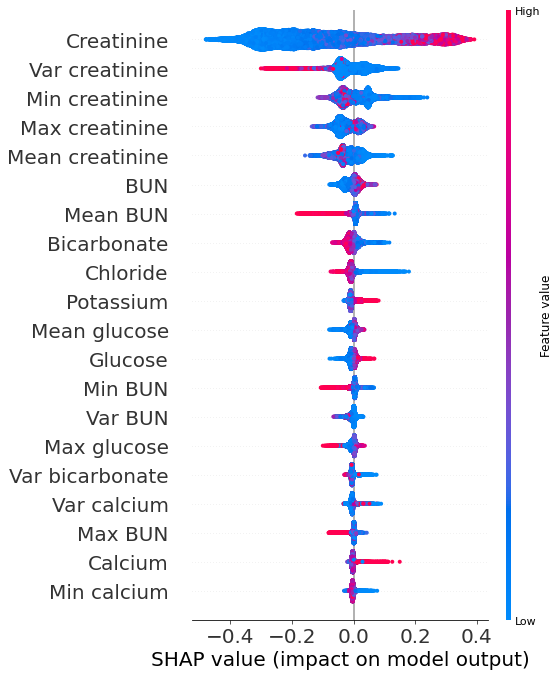

In [160]:
# import shap

# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(xgbrf)

# # calculate shap values. This is what we will plot.
# # Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
# shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test, show=False)
plt.yticks(np.arange(20), ['Min calcium', 'Calcium', 'Max BUN', 'Var calcium', 'Var bicarbonate', \
                           'Max glucose', 'Var BUN', 'Min BUN', 'Glucose', 'Mean glucose', 'Potassium', \
                             'Chloride', 'Bicarbonate', 'Mean BUN', 'BUN', 'Mean creatinine', \
                           'Max creatinine', 'Min creatinine', 'Var creatinine', 'Creatinine'
                          ])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SHAP value (impact on model output)', fontsize=20)
plt.tight_layout()
plt.savefig('../images/xgb_shap.png')

In [176]:
y_test_score_pred = pd.DataFrame({'index': y_test.index, 'y_test':y_test.values, 'y_score':y_scorerf, 'y_pred': y_predrf})
y_test_score_pred.set_index('index', inplace=True)
y_test_score_pred

,y_test,y_score,y_pred
index,,,
0,1.0,0.0,0.481117
1,1.0,1.0,0.570907
2,0.0,0.0,0.464456
3,0.0,1.0,0.583454
4,1.0,1.0,0.593227
...,...,...,...
89294,0.0,0.0,0.405889
89295,0.0,0.0,0.486689
89324,0.0,0.0,0.442948


In [177]:
class_gt_pred = pd.concat([fold4[['patientunitstayid', 'time_to_detect', 'labresultoffset', 'creatinine', 'BUN',\
                                  'positive_window']], y_test_score_pred], axis=1, ignore_index=False)
class_gt_pred

,patientunitstayid,time_to_detect,labresultoffset,creatinine,BUN,positive_window,y_test,y_score,y_pred
0,141227,1 days 00:50:00,-128,1.40,26.0,1.0,1.0,0.0,0.481117
1,141227,0 days 22:55:00,-13,1.50,26.0,1.0,1.0,1.0,0.570907
2,141462,2 days 20:56:00,-1114,1.07,14.0,0.0,0.0,0.0,0.464456
3,141462,1 days 23:10:00,192,1.29,18.0,0.0,0.0,1.0,0.583454
4,141462,0 days 23:35:00,1607,1.34,18.0,1.0,1.0,1.0,0.593227
...,...,...,...,...,...,...,...,...,...
89294,3352755,NaT,3 days 20:49:00,1.02,57.0,0.0,0.0,0.0,0.405889
89295,3352755,NaT,4 days 19:36:00,1.00,54.0,0.0,0.0,0.0,0.486689
89324,3353147,NaT,0 days 02:02:00,1.05,11.0,0.0,0.0,0.0,0.442948
89325,3353147,NaT,0 days 11:16:00,0.94,8.0,0.0,0.0,0.0,0.399815


In [178]:
class_gt_pred[class_gt_pred['time_to_detect'].isna()]['y_score'].sum()/len(class_gt_pred[class_gt_pred['time_to_detect'].isna()])

0.16062785543040667

In [180]:
class_gt_pred[(~class_gt_pred['time_to_detect'].isna()) & (class_gt_pred['y_test']==0)]['y_score'].sum()/len(class_gt_pred[(~class_gt_pred['time_to_detect'].isna()) & (class_gt_pred['y_test']==0)])

0.2960005070672498